In [19]:
#Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
data = pd.read_csv('Linear_Regression.csv') 
data.head()

,x1,x2,x3,x4,x5,y1,y2,y3
0,-0.099362,-0.085577,-0.143910,-0.104020,0.29407,2.72,3.02,31.52
1,-0.166140,0.277080,-0.190330,-0.056387,-0.13422,2.90,1.98,21.73
2,-0.252780,-0.085391,-0.096496,0.422420,-0.27044,3.63,2.84,29.20
3,0.072448,0.554370,-0.046507,0.325990,-0.33308,3.24,1.69,20.32
4,-0.266970,-0.108820,0.038903,0.215480,-0.44817,3.94,1.99,22.73


In [21]:
x = pd.read_csv('F20_M4DS_project_LR_X.csv',names=["x1","x2","x3","x4"]) #read the data

In [22]:
y = pd.read_csv('F20_M4DS_project_LR_Y.csv',names=["y1","y2","y3"]) #read the data

In [23]:
#Reading data and create matrices
my_data = np.genfromtxt('F20_M4DS_project_LR_X.csv', delimiter=',') # read the data
my_data1 = np.genfromtxt('F20_M4DS_project_LR_Y.csv', delimiter=',') # read the data
X = my_data[:, 0].reshape(-1,1) # -1 tells numpy to figure out the dimension by itself
ones = np.ones([X.shape[0], 1]) # create a array containing only ones 
X = np.concatenate([ones, X],1) # cocatenate the ones to X matrix
y = my_data1[:, 1].reshape(-1,1) # create the y matrix

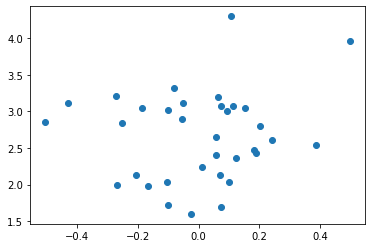

In [24]:
plt.scatter(my_data[:, 0].reshape(-1,1), y)

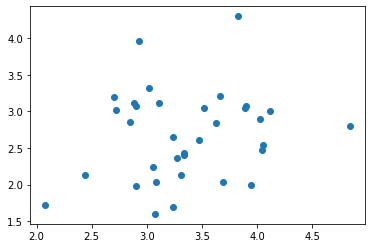

In [25]:
plt.scatter(my_data1[:, 0].reshape(-1,1), y)

In [26]:
#Setting the hyper paramenters
# notice small alpha value
alpha = 0.1
iters = 1000

# theta is a row vector
theta = np.array([[1.0, 1.0]])

#Creating the cost function
def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2) # @ means matrix multiplication of arrays. If we want to use * for multiplication we will have to convert all arrays to matrices
    return np.sum(inner) / (2 * len(X))

computeCost(X, y, theta)

1.5888764729276617

In [27]:
#Create the Gradient Descent function
def gradientDescent(X, y, theta, alpha, iters):
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum((X @ theta.T - y) * X, axis=0)
        cost = computeCost(X, y, theta)
        # if i % 10 == 0: # just look at cost every ten loops for debugging
        #     print(cost)
    return (theta, cost)

g, cost = gradientDescent(X, y, theta, alpha, iters)  
print(g, cost)

[[2.67382388 0.4091104 ]] 0.18029560863335958


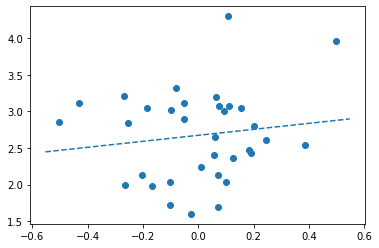

In [28]:
#Another plot
plt.scatter(my_data[:, 0].reshape(-1,1), y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim()) 
y_vals = g[0][0] + g[0][1]* x_vals #the line equation
plt.plot(x_vals, y_vals, '--')

In [29]:
#create gradient descent
#gradient descent
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

#running the gd and cost function
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

finalCost = computeCost(X,y,g)
print(finalCost)

[[2.67382388 0.4091104 ]]
0.18029560863335958


Text(0.5, 1.0, 'Error vs. Training Epoch')

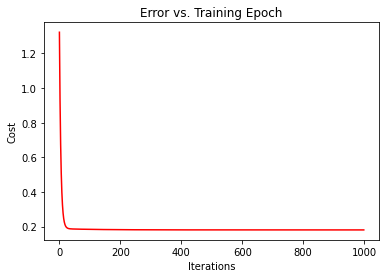

In [30]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

In [31]:
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))
 
# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])
 
# calculate mean and variance
dataset = data.values
x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
mean_x, mean_y = mean(x), mean(y)
var_x, var_y = variance(x, mean_x), variance(y, mean_y)
print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))

x stats: mean=-0.000 variance=1.467
y stats: mean=-0.000 variance=2.030


In [32]:
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

In [33]:
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))
 
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar
 
# calculate covariance
dataset = data.values
x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
mean_x, mean_y = mean(x), mean(y)
covar = covariance(x, mean_x, y, mean_y)
print('Covariance: %.3f' % (covar))

Covariance: 0.227


In [34]:
# Standalone simple linear regression example
from math import sqrt

# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
    test_set = list()
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(dataset, test_set)
    print(predicted)
    actual = [row[-1] for row in dataset]
    rmse = rmse_metric(actual, predicted)
    return rmse

# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))

# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

# Simple linear regression algorithm
def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    return predictions

# Test simple linear regression
dataset = data.values
rmse = evaluate_algorithm(dataset, simple_linear_regression)
print('RMSE: %.3f' % (rmse))


# Standalone simple linear regression example
from math import sqrt
 
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)
 
# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
    test_set = list()
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(dataset, test_set)
    print(predicted)
    actual = [row[-1] for row in dataset]
    rmse = rmse_metric(actual, predicted)
    return rmse
 
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))
 
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar
 
# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])
 
# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]
 
# Simple linear regression algorithm
def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    return predictions
 

[-0.015351663067568867, -0.025668762046749657, -0.0390545096815429, 0.011192719447826186, -0.04124684300261533, -0.004024607575361265, -0.04164853903043692, 0.009018771444950197, 0.009934020394494461, -0.031655577846013715, 0.017351337548220092, 0.0016771585426217075, 0.008942449199664094, 0.014529731949717914, 0.05964683930838859, -0.06647644351925588, -0.015657261045657754, 0.015559155270246854, -0.015961623035968726, -0.008124379034697293, 0.03752729303792058, -0.028928679810994087, 0.010696933850411, -0.07770848245103645, 0.016418166775896095, 0.029193645445345, 0.023797013810034198, 0.07678998978803608, 0.019202229245644183, -0.008029053477325784, 0.011211722759911594, 0.02837325855775553, -0.012586603909906185, 0.031042992158046703]
RMSE: 27.685
